In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
# ENABLE IF USING COLAB
USE_COLAB = False

if USE_COLAB:
    import os
    import shutil
    if os.path.exists('/content/spectroconv/'):
        shutil.rmtree('/content/spectroconv/') #deletes a directory and all its contents.
    !git clone https://github.com/jakeval/spectroconv.git
    !pip install hub
    !pip install hub[audio]
    import sys
    sys.path.insert(0,'/content/spectroconv')

In [81]:
from data_utils import nsynth_adapter as na
from matplotlib import pyplot as plt
from models import train_model, cnn_model
import numpy as np

# Train on just two classes

## Construct and visualize subset

In [39]:
train_data = na.NsynthDataset(source='train')
train_data.initialize()
X, y, ids = train_data.get_data(selected_families=[6, 4], instruments_per_family=8, max_pitch=67, min_pitch=53)
print("Finished loading spectrograms")

df = train_data.visualize_new_dataset(ids)
for i in range(df.shape[0]):
    spectrogram = df.iloc[i]['audio']
    fig, ax = spectrogram.visualize()
    instrument_family = na.InstrumentFamily(df.iloc[i]['family']).name
    instrument = df.iloc[i]['instrument']
    ax.set_title(f"{instrument_family} {instrument} (pitch {df.iloc[i]['pitch']}, id {df.iloc[i]['id']})")
    plt.show(fig)
    spectrogram.play()

hub://jakeval/nsynth-train-metadata loaded successfully.


/home/jakeval/umass/682/project/spectroconv/.env/lib/python3.8/site-packages/hub/core/fast_forwarding.py:43: UserWarning: Loading a dataset that was created or updated with a newer version of hub. This could lead to corruption or unexpected errors! Dataset version: 2.3.3, current hub version: 2.3.2. It's recommended that you update to a version of hub >= 2.3.3.
  warnings.warn(


This dataset can be visualized at https://app.activeloop.ai/jakeval/nsynth-train-metadata.
hub://jakeval/nsynth-train loaded successfully.
This dataset can be visualized at https://app.activeloop.ai/jakeval/nsynth-train.
Begin loading 2490 spectrograms...
(2490, 128, 71)


In [44]:
val_data = na.NsynthDataset(source='validate')
val_data.initialize(code_lookup=train_data.code_lookup)
X_val, y_val, ids_val = val_data.get_data(selected_families=[4, 6], instruments_per_family=4, max_pitch=67, min_pitch=53)
print("Finished loading spectrograms")

df = val_data.visualize_new_dataset(ids_val, audio_source='validate')
for i in range(df.shape[0]):
    spectrogram = df.iloc[i]['audio']
    fig, ax = spectrogram.visualize()
    instrument_family = na.InstrumentFamily(df.iloc[i]['family']).name
    instrument = df.iloc[i]['instrument']
    ax.set_title(f"{instrument_family} {instrument} (pitch {df.iloc[i]['pitch']}, id {df.iloc[i]['id']})")
    plt.show(fig)
    spectrogram.play()

hub://jakeval/nsynth-val-metadata loaded successfully.


/home/jakeval/umass/682/project/spectroconv/.env/lib/python3.8/site-packages/hub/core/fast_forwarding.py:43: UserWarning: Loading a dataset that was created or updated with a newer version of hub. This could lead to corruption or unexpected errors! Dataset version: 2.3.3, current hub version: 2.3.2. It's recommended that you update to a version of hub >= 2.3.3.
  warnings.warn(


This dataset can be visualized at https://app.activeloop.ai/jakeval/nsynth-val-metadata.
hub://jakeval/nsynth-val loaded successfully.
This dataset can be visualized at https://app.activeloop.ai/jakeval/nsynth-val.
Begin loading 1092 spectrograms...


In [89]:
clf = cnn_model.CnnClf(2, (128, 71))
clf, losses, train_accuracies, val_accuracies = train_model.train_model(clf, X, y, X_val, y_val, epochs=10)

Check starting accuracy...
0.4375 0.4921875
Start Training...
epoch 1 		 loss: 0.622 	 train: 0.961 	 val: 0.961
epoch 2 		 loss: 0.148 	 train: 0.969 	 val: 0.969
epoch 3 		 loss: 0.073 	 train: 1.000 	 val: 1.000
epoch 4 		 loss: 0.055 	 train: 0.945 	 val: 0.945
epoch 5 		 loss: 0.050 	 train: 0.992 	 val: 0.992
epoch 6 		 loss: 0.015 	 train: 1.000 	 val: 1.000
epoch 7 		 loss: 0.007 	 train: 1.000 	 val: 1.000
epoch 8 		 loss: 0.003 	 train: 1.000 	 val: 1.000
epoch 9 		 loss: 0.002 	 train: 1.000 	 val: 1.000
epoch 10 		 loss: 0.001 	 train: 1.000 	 val: 1.000


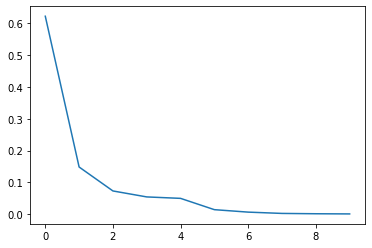

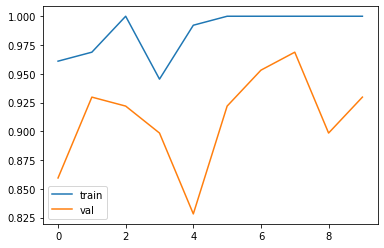

In [90]:
fig, ax = plt.subplots()
ax.plot(losses)
fig, ax = plt.subplots()
ax.plot(train_accuracies, label='train')
ax.plot(val_accuracies, label='val')
ax.legend()
plt.show()

## Train on the full dataset

In [182]:
train_data = na.NsynthDataset(source='train')
train_data.initialize()
dl = train_data.get_dataloader(64)

val_data = na.NsynthDataset(source='validate')
val_data.initialize(code_lookup=train_data.code_lookup)
dl_val = val_data.get_dataloader(64)


clf = cnn_model.CnnClf(len(train_data.codes), (128, 71))
clf, losses, train_accuracies, val_accuracies = train_model.train_model_dataloader(clf, dl, dl_val, epochs=10)

hub://jakeval/nsynth-train-metadata loaded successfully.
This dataset can be visualized at https://app.activeloop.ai/jakeval/nsynth-train-metadata.
hub://jakeval/nsynth-train loaded successfully.
This dataset can be visualized at https://app.activeloop.ai/jakeval/nsynth-train.
hub://jakeval/nsynth-val-metadata loaded successfully.
This dataset can be visualized at https://app.activeloop.ai/jakeval/nsynth-val-metadata.
hub://jakeval/nsynth-val loaded successfully.
This dataset can be visualized at https://app.activeloop.ai/jakeval/nsynth-val.
Start Training...
0
1
2
3
4
5
6
7
8
9
10
11
epoch 1 		 loss: 1.487 	 train: 0.199 	 val: 0.453
0
1
2
3
4
5
6
7
8
9
10
11
epoch 2 		 loss: 1.474 	 train: 0.225 	 val: 0.344
0
1
2
3
4
5
6
7
8
9
10
11
epoch 3 		 loss: 1.460 	 train: 0.225 	 val: 0.328


In [ ]:
fig, ax = plt.subplots()
ax.plot(losses)
fig, ax = plt.subplots()
ax.plot(train_accuracies, label='train')
ax.plot(val_accuracies, label='val')
ax.legend()
plt.show()